### 1. 准确度的陷阱

对于一个癌症预测系统，输入体检信息预测是否患有癌症。  
假如预测准确度能达到99%，那么这个模型看似很好，但是其实不一定。   

假如癌症的发病率只有0.01%，当系统预测所有人都是健康的时候，那么准确度也可以达到99.99%。这个模型99.9%还不如baseline的情况，也就是说这个模型是失败的。

对于数据极度偏斜（Skewed Data）的情况，只用准确度是不合适的。

### 2. 混淆矩阵
混淆矩阵，即Confusion matrix。
一般行代表真实值，列代表预测值。   
一般来说我们一般将FP成为一类错误（Type I error），将FN称作二类错误（Type II Error）。
![](https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg)

通过混淆矩阵，我们可以得到以下指标：
![](https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg)

### 3. 精准率和召回率

精准率（precision），即：  
$precision = \frac{TP}{TP+FP}$  
召回率（recall），即：  
$recall = \frac{TP}{TP+FN}$

假如我们有如下的混淆矩阵：  

|  真实\预测  |   0   | 1  |
|  ----  |----  | ----  |
|  0   | 9928  | 12 |
|  1   |  2  | 8 |

$precision = 8/(8+12) = 40%$  
$recall = 8/(8+2) = 80%$

在刚才的例子中，假如有10000个人待测试，我们预测所有的人都是健康的（发病率0.1%），那么可以得到混淆矩阵为： 

|  真实\预测  |   0   | 1  |
|  ----  |----  | ----  |
|  0   | 9990  | 0 |
|  1   |  10  | 0 |

准备率为：99.9%  
精准率为：0（无意义）  
召回率：0

In [43]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [13]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

In [24]:
# 将其变成一个二分类问题
y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [11]:
from sklearn.linear_model import LogisticRegression

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

/Users/yingli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.98

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
y_pred = log_reg.predict(X_test)

In [29]:
confusion_matrix(y_test, y_pred)

array([[403,   4],
       [  5,  38]])

In [30]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9047619047619048

In [31]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.8837209302325582

### 4. F1 score

有时候我们更注重精准率，比如股票预测，我们不希望有更多的假阳性；  
有时候我们更注重召回率，比如病人诊断，FN大的话，有病人并没有被诊断出来。

有时候我们想到同时关注这两个方面，兼顾精准率和召回率。  
这就是F1分数，也就是精准率和召回率的调和平均值。  

$\frac{1}{F1} = \frac{1}{2}(\frac{1}{precision} + \frac{1}{recall})$  

即：
$F1 = \frac{2 precision \times recall}{precision + recall}$

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.8941176470588236

### 5. PR曲线
PR-curve其实就是precision-recall curve， 一般横轴是精准率，纵轴是召回率。

In [33]:
# 逻辑回归中的决策函数是将分数0以下的当成负样本，以上的为正样本

decision_scores = log_reg.decision_function(X_test) 

In [35]:
print(np.min(decision_scores))
print(np.max(decision_scores))

-63.52074161853937
19.1295109980179


In [37]:
# 假如大于5才分类为正样本
y_pred2 = np.array(decision_scores >= 5, dtype='int')
print(precision_score(y_test, y_pred2))
print(recall_score(y_test, y_pred2))

0.96875
0.7209302325581395


In [38]:
# 假如阈值为-5
y_pred3 = np.array(decision_scores >= -5, dtype='int')
print(precision_score(y_test, y_pred3))
print(recall_score(y_test, y_pred3))

0.6119402985074627
0.9534883720930233


精准率和召回率之间是相互平衡的。

In [39]:
# 当我们给出一系列阈值

thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)

In [41]:
precisions = []
recalls = []
for threshold in thresholds:
    y_pred = np.array(decision_scores >= threshold, dtype = 'int')
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))

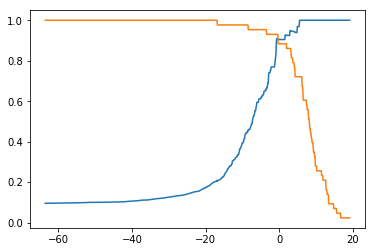

In [44]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

[]

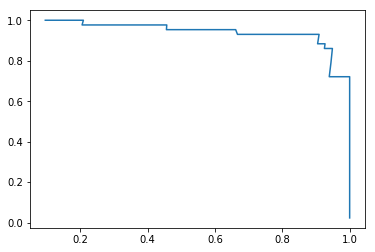

In [45]:
plt.plot(precisions, recalls)
plt.plot()

In [55]:
# sklearn中的实现
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, decision_scores)

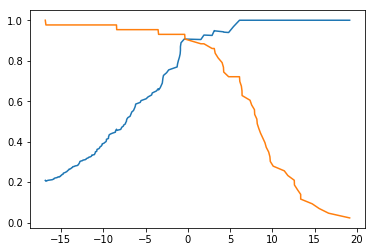

In [57]:
plt.plot(thresholds, precisions[:-1])
plt.plot(thresholds, recalls[:-1])
plt.show()

[]

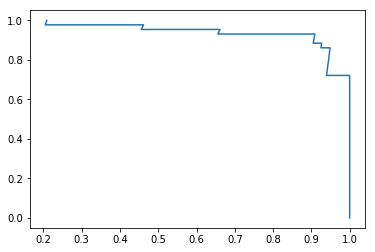

In [59]:
# PR-curve
plt.plot(precisions, recalls)
plt.plot()

### 6. ROC曲线

ROC曲线全称为Receiver Operation Characteristic Curve，描述TPR和FPR之间的关系。  
TPR其实就是True positive rate，也就是recall值；  
FPR是False positive rate，即$FPR = \frac{FP}{TN+FP}$

In [60]:
from sklearn.metrics import roc_curve
fprs, tprs, thresholds = roc_curve(y_test, decision_scores)

[]

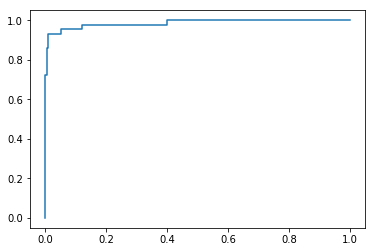

In [61]:
# ROC-curve
plt.plot(fprs, tprs)
plt.plot()

In [62]:
# 底部的面积 ROAUC
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, decision_scores)

0.985372264442032

ROAUC用于比较模型之间的优劣。

### 7. 多分类问题中的混淆矩阵

In [71]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [72]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

/Users/yingli/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


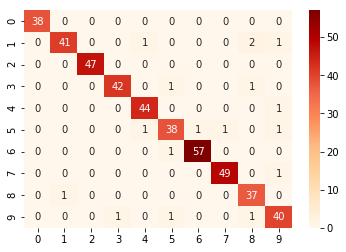

In [79]:
import seaborn as sns
cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cmap='OrRd')
plt.show()

In [74]:
# 看哪里容易犯错
row_sums = np.sum(cfm, axis = 1)
err_matrix = cfm / row_sums
np.fill_diagonal(err_matrix, 0)

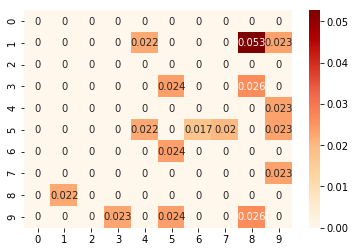

In [78]:
sns.heatmap(err_matrix, annot=True, cmap='OrRd')
plt.show()